In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
weekly = pd.read_csv('/Users/jason/Documents/UMKC/Fall_2018/Statistical_Learning/Lab3/Weekly.csv')

In [3]:
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [8]:
weekly = weekly[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']]

In [9]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down


2. This question should be answered using the Weekly data set, which is part of the ISLR
package. This data is similar in nature to the Smarket data from this chapters lab,
except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990
to the end of 2010.

Produce some numerical and graphical summaries of the Weekly data.
Do there appear to be any patterns?

In [10]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,2000.057904,0.149973,0.149773,0.150958,0.146163,0.143223,1.575922,0.150285
std,6.028249,2.358010,2.357944,2.358335,2.361337,2.359810,1.686862,2.357977
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.155000,-1.155000,-1.155000,-1.160000,-1.160000,0.332956,-1.155000
50%,2000.000000,0.241000,0.241000,0.241000,0.239500,0.236000,1.004840,0.241000
75%,2005.000000,1.406000,1.406000,1.409000,1.409000,1.406000,2.056230,1.406000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


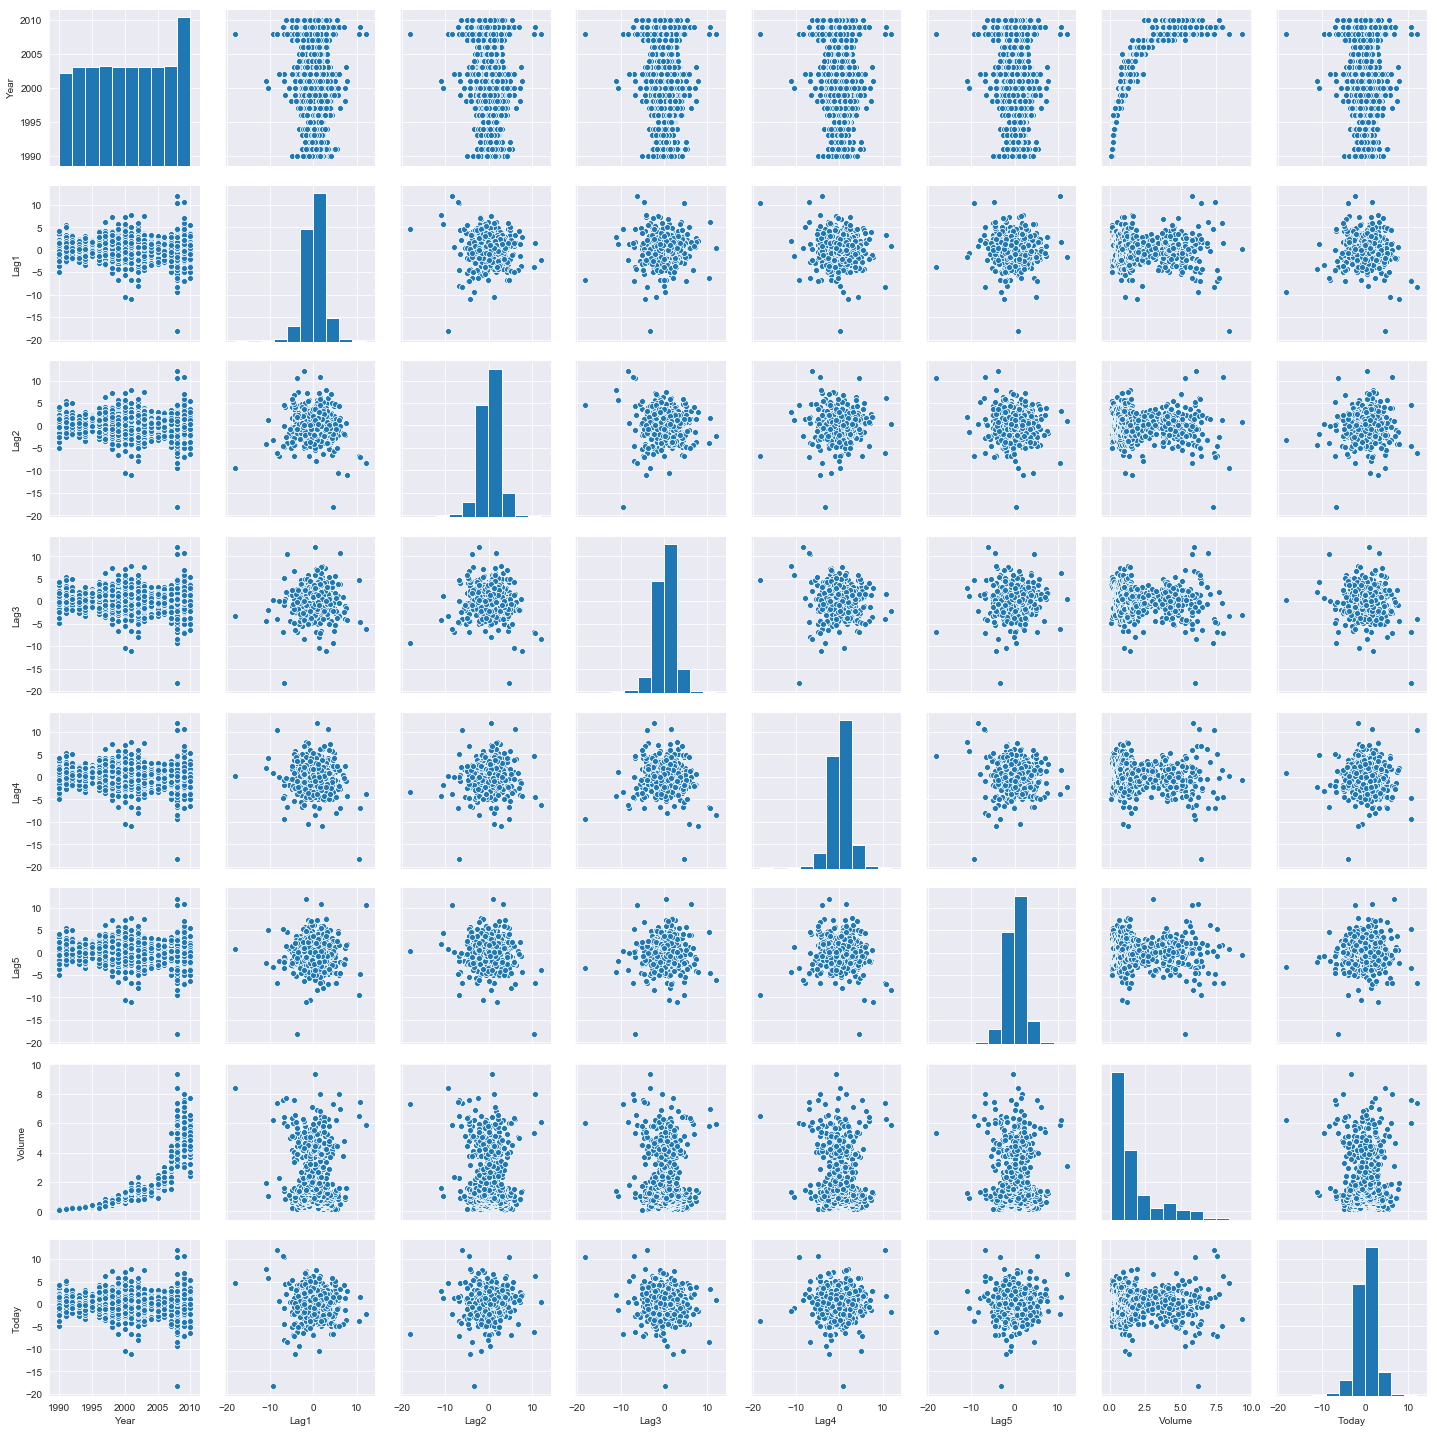

In [12]:
sns.pairplot(weekly)

In [13]:
cm = weekly.corr()
cm

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.031899,-0.032513,-0.032744,-0.031412,-0.032948,0.842001,-0.032775
Lag1,-0.031899,1.000000,-0.075025,0.059169,-0.071236,-0.007793,-0.064756,-0.074989
Lag2,-0.032513,-0.075025,1.000000,-0.074877,0.058480,-0.071738,-0.085088,0.059276
Lag3,-0.032744,0.059169,-0.074877,1.000000,-0.075754,0.058358,-0.070748,-0.071627
Lag4,-0.031412,-0.071236,0.058480,-0.075754,1.000000,-0.075982,-0.061218,-0.007852
Lag5,-0.032948,-0.007793,-0.071738,0.058358,-0.075982,1.000000,-0.059790,0.010773
Volume,0.842001,-0.064756,-0.085088,-0.070748,-0.061218,-0.059790,1.000000,-0.033227
Today,-0.032775,-0.074989,0.059276,-0.071627,-0.007852,0.010773,-0.033227,1.000000


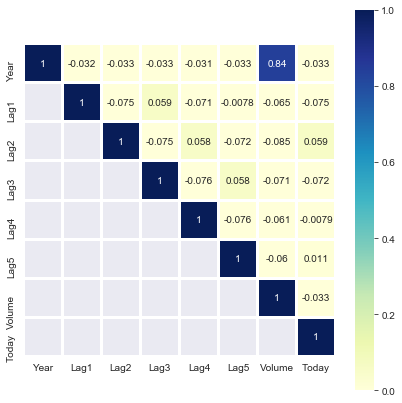

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()


Volume and year appear to be highlhy correlated. Judging by the pairwise plots the relationship appears to be exponential. 

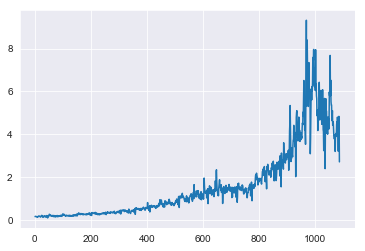

In [15]:
plt.plot(weekly.Volume)
plt.show()

Use the full data set to perform a logistic regression with Direction as the
response and the five lag variables plus Volume as predictors. Use the summary
function to print the results. Do any of the predictors appear to be statistically
significant? If so, which ones?

In [16]:
lags = [x for x in weekly.columns if 'Lag' in x]
lags.append('Volume')
formula = 'Direction~' + '+'.join(lags)
formula

'Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [18]:
mod1 = smf.glm(formula=formula, data=weekly, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1088
Model:                                              GLM   Df Residuals:                     1081
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -742.23
Date:                                  Wed, 26 Sep 2018   Deviance:                       1484.5
Time:                                          15:28:53   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2718      0.086     -3.159      0.002      -0.440      -0.103
Lag1           0.0410      0.026      1.552      0.121      -0.011       0.093
Lag2          -0.0588      0.027     -2.189      0.029      -0.112      -0.006
Lag3           0.0178      0.027      0.667      0.505      -0.035       0.070
Lag4           0.0283      0.026      1.069      0.285      -0.024       0.080
Lag5           0.0160      0.026      0.605      0.545      -0.036       0.068
Volume         0.0241      0.037      0.653      0.514      -0.048       0.096
==============================================================================
"""

In [55]:
weekly['Direction'] = weekly['Direction'].astype('category')

Lag2 appears to be the only predictor reaching statistical significance. 

Compute the confusion matrix and overall fraction of correct predictions.
Explain what the confusion matrix is telling you about the types of mistakes
made by logistic regression.

In [42]:
x = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly['Direction']
model = lm.LogisticRegression()
ynew = model.fit(x, y).predict(x)
confusion_matrix(y, ynew)

array([[ 55, 428],
       [ 50, 555]])

In [144]:
print(classification_report(y, ynew, digits=3))

             precision    recall  f1-score   support

       Down      0.524     0.114     0.187       483
         Up      0.565     0.917     0.699       605

avg / total      0.546     0.561     0.472      1088



In [142]:
y.describe()

count     1088
unique       2
top         Up
freq       605
Name: Direction, dtype: object

Unfortuantely the glm version does not prevides probabilities on prediction and the sci-kit learn method does not have a summary function so both models were used for different purposes. The confusion matrix here shows that 55 Downs were correctly classified as Down. 555 Ups were correctly classified as Up. 438 Ups were incorrectly classified as Downs and 50 Downs were incorrectly classified as Ups.
Approximately 48% of downs were incorrectly classified and 44% of Ups were incorrectly classified

Now fit the logistic regression model using a training data period from
1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix
and the overall fraction of correct predictions for the held out data (that is, the
data from 2009 and 2010).

In [80]:
weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [84]:
cols = list(weekly.columns)
cols[0] = 'Year'
weekly.columns = cols
weekly.set_index('Year', inplace=True)
weekly.tail()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [105]:
X_train = weekly.loc[:2008][['Lag2']]
y_train = weekly.loc[:2008]['Direction']

X_test = weekly.loc[2008:][['Lag2']]
y_test = weekly.loc[2008:]['Direction']

In [95]:
weekly.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

In [101]:
X_train.head()

,Lag2
Year,
1990,0.816
1990,-0.270
1990,-2.576
1990,3.514
1990,0.712


In [104]:
y_train.tail()

Year
2008    Down
2008      Up
2008      Up
2008    Down
2008      Up
Name: Direction, dtype: category
Categories (2, object): [Down, Up]

In [107]:
X_test.head()

,Lag2
Year,
2008,-0.402
2008,-4.522
2008,-0.752
2008,-5.412
2008,0.409


Logistic Regression

In [115]:
yloglag = model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, yloglag)

array([[14, 58],
       [ 9, 75]])

In [116]:
print(classification_report(y_test, yloglag, digits=3))

             precision    recall  f1-score   support

       Down      0.609     0.194     0.295        72
         Up      0.564     0.893     0.691        84

avg / total      0.585     0.571     0.508       156



LDA

In [110]:
lda = da.LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)

array([[14, 58],
       [ 9, 75]])

In [112]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.609     0.194     0.295        72
         Up      0.564     0.893     0.691        84

avg / total      0.585     0.571     0.508       156



QDA

In [118]:
qda = da.QuadraticDiscriminantAnalysis()
qpred = qda.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, qpred)

array([[ 0, 72],
       [ 0, 84]])

In [119]:
print(classification_report(y_test, qpred, digits=3))

             precision    recall  f1-score   support

       Down      0.000     0.000     0.000        72
         Up      0.538     1.000     0.700        84

avg / total      0.290     0.538     0.377       156



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN with K=1

In [120]:
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)
knn_1_model = knn_1.fit(X_train, y_train)
pred1 = knn_1_model.predict(X_test)
confusion_matrix(y_test, pred1)

array([[47, 25],
       [31, 53]])

In [121]:
print(classification_report(y_test, pred1, digits=3))

             precision    recall  f1-score   support

       Down      0.603     0.653     0.627        72
         Up      0.679     0.631     0.654        84

avg / total      0.644     0.641     0.642       156



KNN regression with K=1 appears to give the best fit for this data. It had the highest overall correct predicition rate with similar precision for both outcomes. Logistic regression and LDA had the same confusion matrix with a slightly higher precision for down predictions. However, this came with a greater cost to Up predicitions

Experiment with different combinations of predictors, including possible
transformations and interactions, for each of the methods. Report the variables,
method, and associated confusion matrix that appears to provide the best results
on the held out data. Note that you should also experiment with values for K in
the KNN classifier

Looking at the correlation matrix it appears that Lag1, 2, 3, and volume exert the strongest effects on today's prices therefore these will be used in our revised model.

In [131]:
X_train = weekly.loc[:2008][['Lag2', 'Lag2', 'Lag3', 'Volume']]
y_train = weekly.loc[:2008]['Direction']

X_test = weekly.loc[2008:][['Lag1', 'Lag2', 'Lag3', 'Volume']]
y_test = weekly.loc[2008:]['Direction']

In [123]:
yloglag = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.609     0.194     0.295        72
         Up      0.564     0.893     0.691        84

avg / total      0.585     0.571     0.508       156



In [124]:
lda = da.LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.531     0.597     0.562        72
         Up      0.613     0.548     0.579        84

avg / total      0.575     0.571     0.571       156



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [125]:
qda = da.QuadraticDiscriminantAnalysis()
qpred = qda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, qpred, digits=3))

             precision    recall  f1-score   support

       Down      0.462     1.000     0.632        72
         Up      0.000     0.000     0.000        84

avg / total      0.213     0.462     0.291       156



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)
knn_1_model = knn_1.fit(X_train, y_train)
pred1 = knn_1_model.predict(X_test)
print(classification_report(y_test, pred1, digits=3))

             precision    recall  f1-score   support

       Down      0.481     0.542     0.510        72
         Up      0.560     0.500     0.528        84

avg / total      0.524     0.519     0.520       156



In [132]:
knn_3 = nb.KNeighborsClassifier(n_neighbors=3)
knn_3_model = knn_3.fit(X_train, y_train)
pred3 = knn_3_model.predict(X_test)
print(classification_report(y_test, pred3, digits=3))

             precision    recall  f1-score   support

       Down      0.473     0.597     0.528        72
         Up      0.554     0.429     0.483        84

avg / total      0.516     0.506     0.504       156



In [133]:
knn_5 = nb.KNeighborsClassifier(n_neighbors=5)
knn_5_model = knn_5.fit(X_train, y_train)
pred5 = knn_5_model.predict(X_test)
print(classification_report(y_test, pred5, digits=3))

             precision    recall  f1-score   support

       Down      0.520     0.542     0.531        72
         Up      0.593     0.571     0.582        84

avg / total      0.559     0.558     0.558       156



Under these cirucmstance it appears that the logisitc regression model fits the best. Our other models lost prediction accuracy. KNN most likely "got lost in dimensionality" from having too many predictors. According to the warning message LDA most likely experience colinearty of variables

Reducing dimensionality and testing other K values

In [127]:
X_train = weekly.loc[:2008][['Lag2']]
y_train = weekly.loc[:2008]['Direction']

X_test = weekly.loc[2008:][['Lag2']]
y_test = weekly.loc[2008:]['Direction']

In [129]:
knn_3 = nb.KNeighborsClassifier(n_neighbors=3)
knn_3_model = knn_3.fit(X_train, y_train)
pred3 = knn_3_model.predict(X_test)
print(classification_report(y_test, pred3, digits=3))

             precision    recall  f1-score   support

       Down      0.593     0.444     0.508        72
         Up      0.608     0.738     0.667        84

avg / total      0.601     0.603     0.593       156



In [130]:
knn_5 = nb.KNeighborsClassifier(n_neighbors=5)
knn_5_model = knn_5.fit(X_train, y_train)
pred5 = knn_5_model.predict(X_test)
print(classification_report(y_test, pred5, digits=3))

             precision    recall  f1-score   support

       Down      0.516     0.444     0.478        72
         Up      0.574     0.643     0.607        84

avg / total      0.548     0.551     0.547       156



Our original one predictor with K=1 appears to provide the best fit of the models tested

In this problem, you will develop a model to predict whether a given car gets high or
low gas mileage based on the Auto data set.

In [157]:
auto = pd.read_csv('/Users/jason/Documents/UMKC/Fall_2018/Statistical_Learning/Lab3/Auto_Lab3.csv', na_values='?').dropna()

In [158]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,260.0,3404,13.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,170.0,3593,12.5,70,1,buick skylark 320
2,18.0,8,318.0,155.0,3336,12.0,70,1,plymouth satellite
3,16.0,8,304.0,155.0,3333,13.0,70,1,amc rebel sst
4,17.0,8,302.0,145.0,3349,11.5,70,1,ford torino


Create a binary variable, mpg01, that contains a 1 if mpg contains a
value above its median, and a 0 if mpg contains a value below its median. You can
compute the median using the median() function. Note you may find it helpful to
use the data.frame() function to create a single data set containing both mpg01
and the other Auto variables.

In [159]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,109.788265,2877.839286,16.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,39.214194,849.193658,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,51.000000,1513.000000,9.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,80.000000,2125.250000,14.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,98.500000,2703.500000,16.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,131.000000,3514.750000,18.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,260.000000,5040.000000,25.800000,82.000000,3.000000


In [160]:
auto['mpg01'] = auto['mpg'] > 23

In [161]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,260.0,3404,13.0,70,1,chevrolet chevelle malibu,False
1,15.0,8,350.0,170.0,3593,12.5,70,1,buick skylark 320,False
2,18.0,8,318.0,155.0,3336,12.0,70,1,plymouth satellite,False
3,16.0,8,304.0,155.0,3333,13.0,70,1,amc rebel sst,False
4,17.0,8,302.0,145.0,3349,11.5,70,1,ford torino,False


In [162]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01              bool
dtype: object

Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other features seem most
likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful
tools to answer this question. Describe your findings.

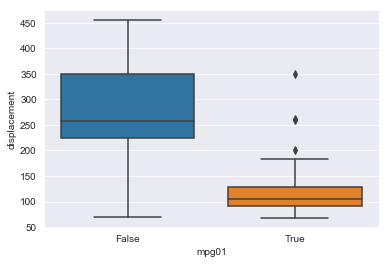

In [163]:
sns.boxplot(x='mpg01', y='displacement', data=auto)

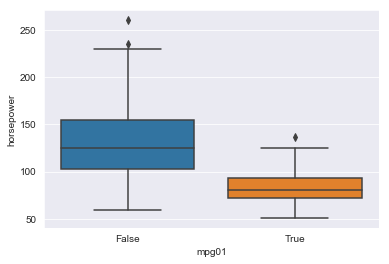

In [164]:
sns.boxplot(x='mpg01', y='horsepower', data=auto)

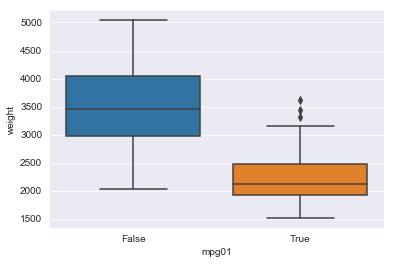

In [165]:
sns.boxplot(x='mpg01', y='weight', data=auto)

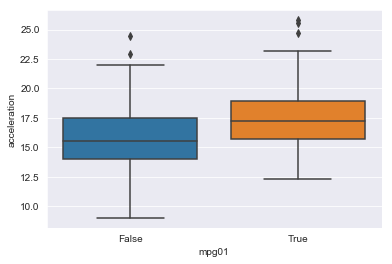

In [166]:
sns.boxplot(x='mpg01', y='acceleration', data=auto)

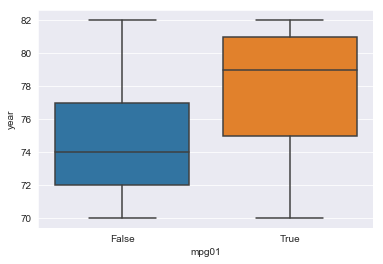

In [167]:
sns.boxplot(x='mpg01', y='year', data=auto)

In [169]:
auto['mpg01'] = auto['mpg01'].astype(int)

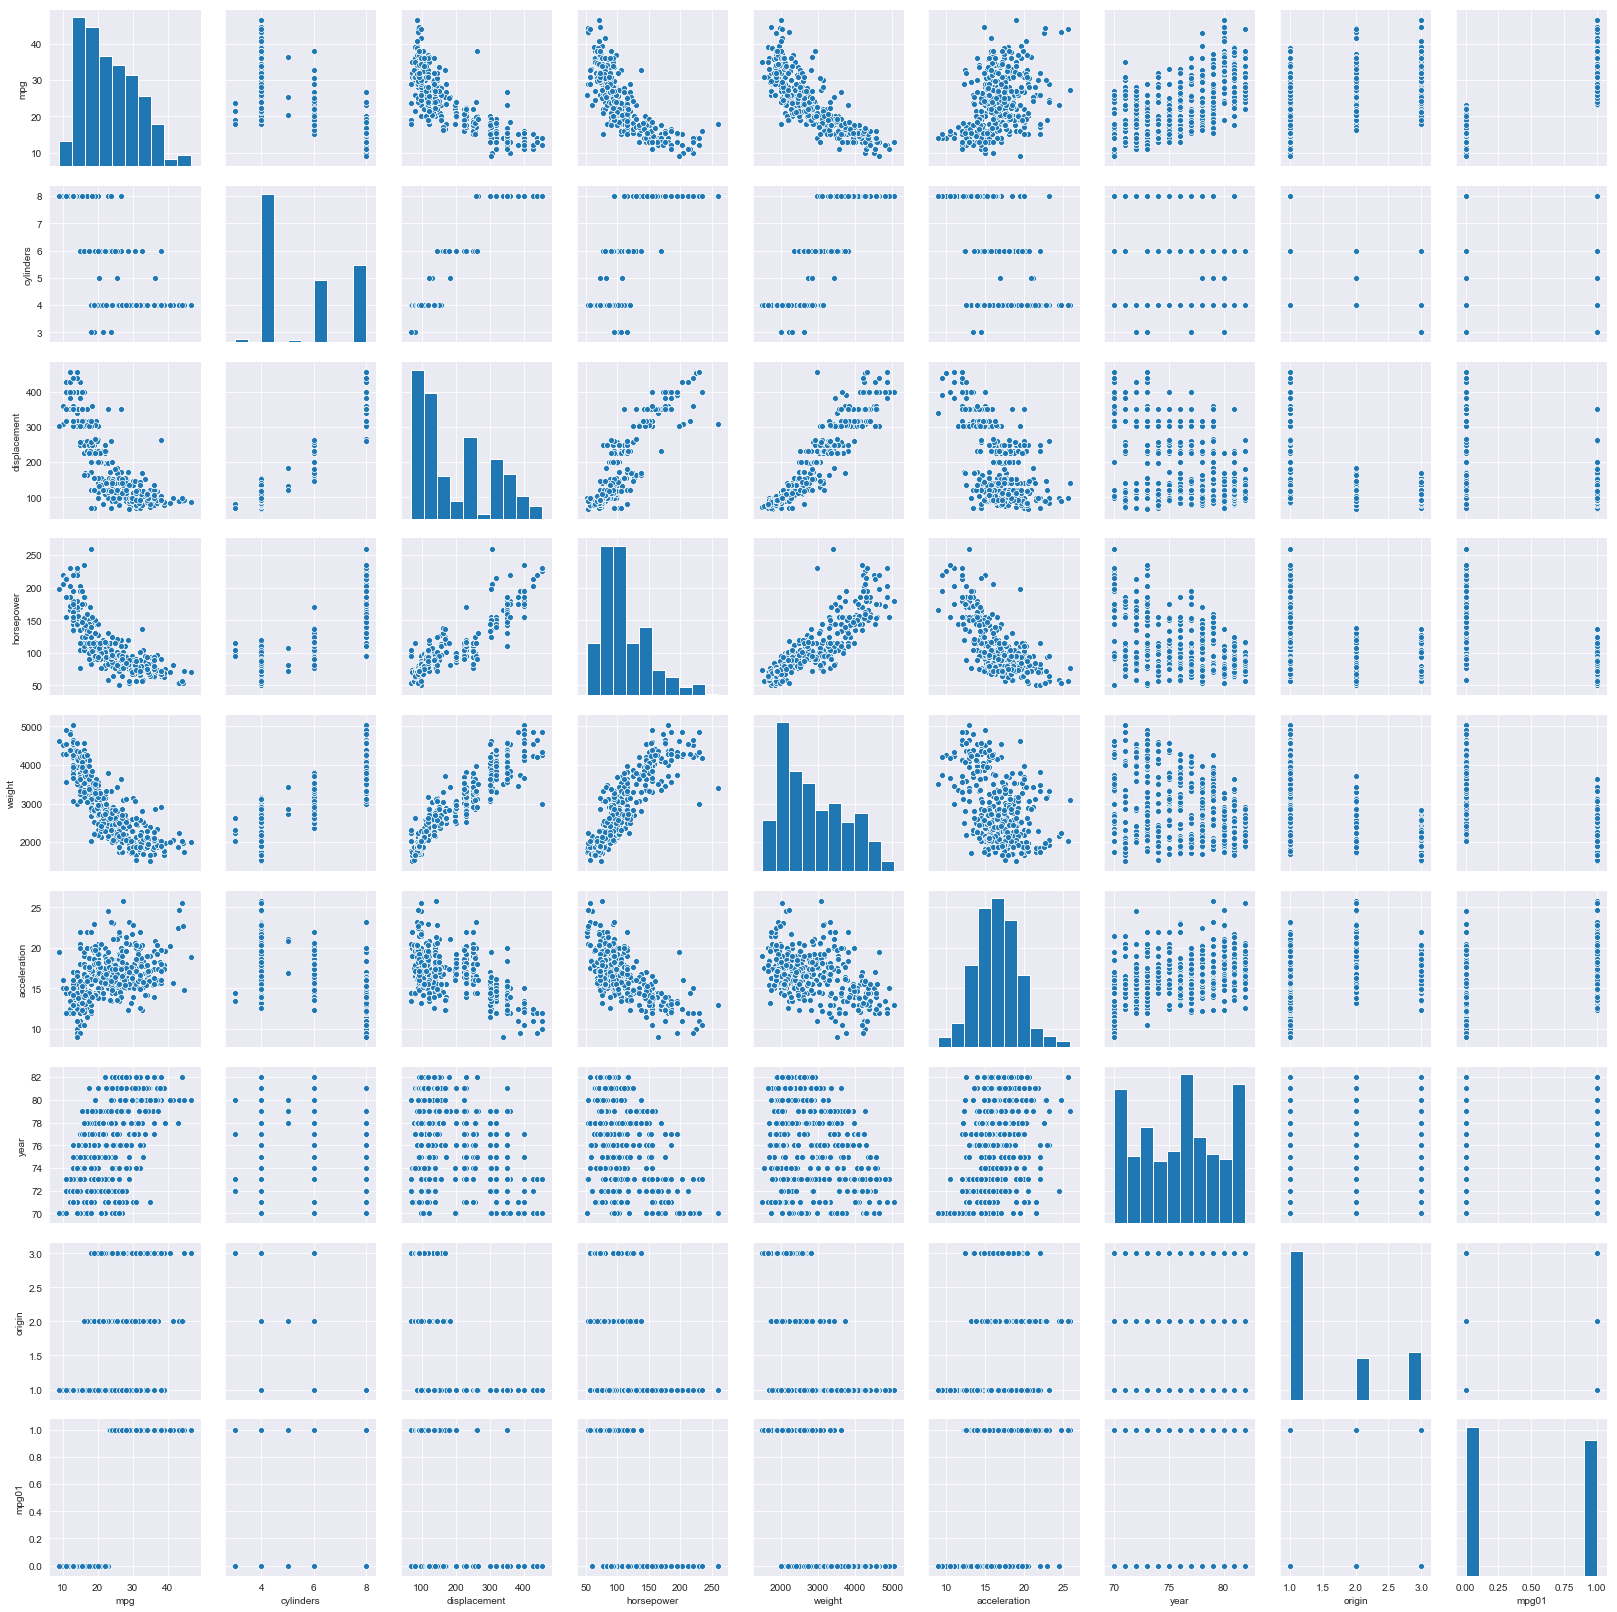

In [170]:
sns.pairplot(auto)

Displacement, horsepower, and weight all appear to have a somewhat negative log relationship with mpg and acceleration seems to increase as mpg increases although the relationship is not clear.

Split the data into a training set and a test set.

Using a 70-30 training test set would yield approximately 275 test observations

In [177]:
X_train = auto.loc[:275][['displacement', 'horsepower', 'weight']]
y_train = auto.loc[:275]['mpg01']

X_test = auto.loc[275:][['displacement', 'horsepower', 'weight']]
y_test = auto.loc[275:]['mpg01']

In [178]:
X_train.tail()

,displacement,horsepower,weight
271,156.0,110.0,2645
272,151.0,90.0,2755
273,119.0,102.0,2305
274,131.0,108.0,2730
275,163.0,130.0,3040


In [179]:
X_test.head()

,displacement,horsepower,weight
275,163.0,130.0,3040
276,121.0,120.0,2695
277,163.0,138.0,3310
278,89.0,76.0,1890
279,98.0,73.0,2035


Perform LDA on the training data in order to predict mpg01 using the
variables that seemed most associated with mpg01 in (b). What is the test error
of the model obtained?

In [180]:
lda = da.LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

          0      0.553     0.955     0.700        22
          1      0.988     0.825     0.899        97

avg / total      0.907     0.849     0.862       119



This corresponds to a 9.3% test error rate

Perform QDA on the training data in order to predict mpg01 using the
variables that seemed most associated with mpg01 in (b). What is the test error
of the model obtained?

In [181]:
qda = da.QuadraticDiscriminantAnalysis()
qpred = qda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, qpred, digits=3))

             precision    recall  f1-score   support

          0      0.457     0.955     0.618        22
          1      0.986     0.742     0.847        97

avg / total      0.888     0.782     0.805       119



11.2% test error rate

Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01 in (b). What
is the test error of the model obtained?

In [182]:
yloglag = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

          0      0.553     0.955     0.700        22
          1      0.988     0.825     0.899        97

avg / total      0.907     0.849     0.862       119



9.3% test error rate

Perform KNN on the training data, with several values of K, in order to
predict mpg01. Use only the variables that seemed most associated with mpg01
in (b). What test errors do you obtain? Which value of K seems to perform the
best on this data set?

In [183]:
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)
knn_1_model = knn_1.fit(X_train, y_train)
pred1 = knn_1_model.predict(X_test)
print(classification_report(y_test, pred1, digits=3))

             precision    recall  f1-score   support

          0      0.392     0.909     0.548        22
          1      0.971     0.680     0.800        97

avg / total      0.864     0.723     0.753       119



13.6% test error

In [185]:
knn_5 = nb.KNeighborsClassifier(n_neighbors=5)
knn_5_model = knn_5.fit(X_train, y_train)
pred5 = knn_5_model.predict(X_test)
print(classification_report(y_test, pred5, digits=3))

             precision    recall  f1-score   support

          0      0.415     1.000     0.587        22
          1      1.000     0.680     0.810        97

avg / total      0.892     0.739     0.769       119



10.8% test error

In [186]:
knn_10 = nb.KNeighborsClassifier(n_neighbors=10)
knn_10_model = knn_10.fit(X_train, y_train)
pred10 = knn_10_model.predict(X_test)
print(classification_report(y_test, pred10, digits=3))

             precision    recall  f1-score   support

          0      0.393     1.000     0.564        22
          1      1.000     0.649     0.788        97

avg / total      0.888     0.714     0.746       119



11.2% test error

In [187]:
knn_15 = nb.KNeighborsClassifier(n_neighbors=15)
knn_15_model = knn_15.fit(X_train, y_train)
pred15 = knn_15_model.predict(X_test)
print(classification_report(y_test, pred15, digits=3))

             precision    recall  f1-score   support

          0      0.478     1.000     0.647        22
          1      1.000     0.753     0.859        97

avg / total      0.904     0.798     0.820       119



9.6

In [188]:
knn_20 = nb.KNeighborsClassifier(n_neighbors=20)
knn_20_model = knn_20.fit(X_train, y_train)
pred20 = knn_20_model.predict(X_test)
print(classification_report(y_test, pred20, digits=3))

             precision    recall  f1-score   support

          0      0.373     1.000     0.543        22
          1      1.000     0.619     0.764        97

avg / total      0.884     0.689     0.723       119



In [190]:
knn_30 = nb.KNeighborsClassifier(n_neighbors=30)
knn_30_model = knn_30.fit(X_train, y_train)
pred30 = knn_30_model.predict(X_test)
print(classification_report(y_test, pred30, digits=3))

             precision    recall  f1-score   support

          0      0.373     1.000     0.543        22
          1      1.000     0.619     0.764        97

avg / total      0.884     0.689     0.723       119



11.6

It appears that K values of 5 and 15 created the best overall test error rates. Although error rates initially increased as the k value increased it appears that somewhere between 10 and 20 there was another spike that yielded the best results. However, further increases in k began to increase error rates.